<a href="https://colab.research.google.com/github/chrismlam/DATA7703/blob/master/Tutorial_2A_ASR_GraphicalRepresentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**COMP3001 - Special Topics in Computer Science 3B - Voyages in Language Technologies**

Chris Lam - 41735613  
Semester 2, 2020

---

# Module 2A: Graphical Representations of Audio Files

In [29]:
!pip install pysoundfile

Import Packages

In [14]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile
import IPython

This is an audio recording of:  

"*2 eggs with spinach, mushrooms, tomatoes*"

In [6]:
audio_file = 'two_eggs.wav'

## Plot Waveform

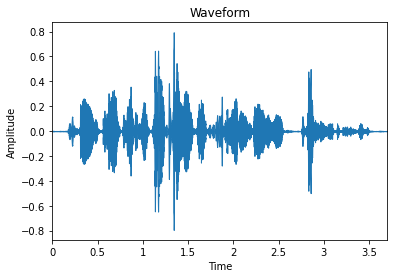

In [30]:
audio_signal, sampling_rate = soundfile.read(audio_file)
librosa.display.waveplot(audio_signal, sampling_rate)
plt.title('Waveform')
plt.ylabel('Amplitude')
IPython.display.Audio(audio_file)

## Plot Spectogram

In [32]:
window_size = 0.025
window_shift = 0.0030
window_length = int(window_size * sampling_rate)
hop_length = int(window_shift * sampling_rate)

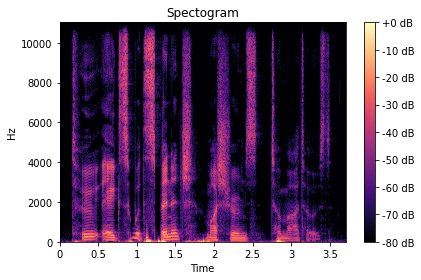

In [28]:
spectogram = np.abs(librosa.stft(audio_signal, 
                                 hop_length = hop_length,
                                 win_length = window_length))

librosa.display.specshow(librosa.amplitude_to_db(spectogram, ref = np.max),
                                                  sr = sampling_rate,
                                                  hop_length = hop_length,
                                                  y_axis = 'linear',
                                                  x_axis = 'time')

plt.title('Spectogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

## Plot MFCC

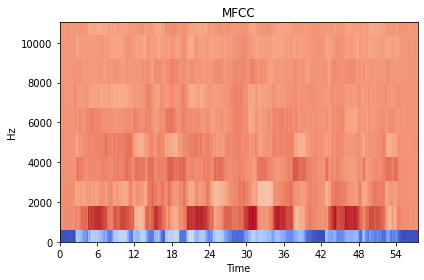

In [39]:
# Extract MFCC
mfccs = librosa.feature.mfcc(audio_signal,
                             sr = sampling_rate,
                             n_mfcc = 10,
                             n_mels = 60,
                             n_fft = window_length,
                             hop_length = hop_length).T

# Plot MFCC
librosa.display.specshow(mfccs.T, x_axis = 'time', y_axis = 'linear')
plt.title('MFCC')
plt.tight_layout()